NOTE THIS CODE WILL NOT RUN DUE TO changes in the error calculations code

In [1]:
from LabDataAnalysis.CircuitSolvers import *
from LabDataAnalysis.DataAnalysis import *
from LabDataAnalysis.ErrorCalculations import *
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

# Problem 1.1

In [2]:
resistances_10k = np.array([9.83, 9.855, 9.855, 9.825, 9.885])*1000
resistances_10k =  list(map(lambda x: dmm_err_resistance(x, 0.001e3), resistances_10k ))
print(f"Should be resistance of 10k")
print(resistances_10k)

Should be resistance of 10k
[9830.0+/-248.75, 9855.0+/-249.375, 9855.0+/-249.375, 9825.0+/-248.625, 9885.0+/-250.125]


In [3]:
capacitances = np.array([9.27, 9.58, 9.62, 9.11, 9.88])*1e-9
capacitances =  list(map(lambda x: dmm_err_capacitance(x, 0.01e-9), capacitances))
print("Should be capacitance of 10nF")
print(capacitances)

Should be capacitance of 10nF
[9.27e-09+/-2.8175e-10, 9.58e-09+/-2.895e-10, 9.62e-09+/-2.905e-10, 9.11e-09+/-2.7775e-10, 9.880000000000001e-09+/-2.97e-10]


# Problem 1.2

In [4]:
print(f"12v measurement  with dmm is {12.06}+/-{dmm_err_dc_voltage(12.06)}")
print(f"5v measurement   with dmm is {5.05}+/-{dmm_err_dc_voltage(5.05)}")
print(f"3.3v measurement with dmm is {3.31}+/-{dmm_err_dc_voltage(3.31)}")
print(f"12v measurement  with ads is {12.062}+/-{ads_err_volt_voltmeter(12.062)}")
print(f"5v measurement   with ads is {5.066}+/-{ads_err_volt_voltmeter(5.066)}")
print(f"3.3v measurement with ads is {3.326}+/-{ads_err_volt_voltmeter(3.326)}")

12v measurement  with dmm is 12.06+/-12.06+/-0.07
5v measurement   with dmm is 5.05+/-5.050+/-0.035
3.3v measurement with dmm is 3.31+/-3.310+/-0.027
12v measurement  with ads is 12.062+/-12.0620+/-0.0010
5v measurement   with ads is 5.066+/-5.0660+/-0.0010
3.3v measurement with ads is 3.326+/-3.3260+/-0.0010


# Problem 1.3

Collected data and put in the notebook, no analysis required

# Problem 1.4

In [5]:
print("Theory")
v_out, v_r1, v_r2, I = voltage_divider(12.0, 10.0e3, -12.0, 5.1e3)
print(f"v_out is {v_out} V")
print(f"voltage through resistor 1 is {v_r1} V")
print(f"voltage through resistor 2 is {v_r2} V")
print(f"current through resistor 1 is {I}")


Theory
v_out is -3.8940397350993377 V
voltage through resistor 1 is 15.894039735099337 V
voltage through resistor 2 is -8.105960264900663 V
current through resistor 1 is 0.0015894039735099338


In [6]:

v_out =dmm_err_dc_voltage(3.91)
v_r1 = dmm_err_dc_voltage(15.97) 
v_r2 = dmm_err_dc_voltage(-8.12)
I = dmm_err_dc_current(1.618e-3, 0.001e-3, bypass=True)

print(f"v_out is {v_out} V")
print(f"voltage through resistor 1 is {v_r1} V")
print(f"voltage through resistor 2 is {v_r2} V")
print(f"current through resistor 1 is {I}")

resistor10k_calc = v_r1 / I
resistor5_1k_calc = v_r2/I
resistor1 = resistance_err(10e3)
resistor2 = resistance_err(5.1e3)

print(f"Resistor 10k: {resistor10k_calc}")
print(f"Resistor 5.1k: {resistor5_1k_calc}")
print(
    f"Result from 10k agreement test: {agreement_test(resistor10k_calc, resistor1)}"
)
print(
    f"Result from 5.1k agreement test: {agreement_test(resistor5_1k_calc, resistor2)}"
)

v_out is 3.910+/-0.030 V
voltage through resistor 1 is 15.97+/-0.09 V
voltage through resistor 2 is -8.12+/-0.05 V
current through resistor 1 is 0.001618+/-0.000014
Resistor 10k: (9.87+/-0.10)e+03
Resistor 5.1k: (-5.02+/-0.05)e+03
Result from 10k agreement test: True
Result from 5.1k agreement test: True


# Problem 1.5

In [7]:
v_out, v_r1, v_r2, I = voltage_divider(
    ads_err_voltage_output(12.0),
    ufloat(10.0e3, 10.0e3 * 0.01),
    ads_err_voltage_output(-12.0),
    ads_err_voltage_output(5.1e3)
)

p_r1 = v_r1 * I
p_r2 = v_r2 * I
print(f"The power disipated by the 10k resistor is {p_r1}W")
print(f"The power disipated by the 5.1k resistor is {p_r2}W")

print(f"We want to avoid resistors of less than {(24)**2/0.25}Ohm")

The power disipated by the 10k resistor is 0.025+/-0.020W
The power disipated by the 5.1k resistor is -0.013+/-0.009W
We want to avoid resistors of less than 2304.0Ohm


# Problem 1.6

JUST MATH

# Problem 1.7

In [8]:
print(f"DMM Measurement is {dmm_err_ac_voltage(0.710)}")
print(f"ADS Measurement is {ufloat(0.710, 0.001)}")
ads_err_volt_oscilliscope_l = lambda x: ads_err_volt_oscilliscope(x, 0.4)
print(
    f"Oscilliscope ADS Measurement{ads_err_volt_oscilliscope(0.70775)}"
)

print(f"DMM is {dmm_err_ac_voltage(0.730)}")
print(f"Voltmeter is {ads_err_volt_voltmeter(0.708)}")
print(f"Scope is {ads_err_volt_oscilliscope_l(0.70793)}")
print(f"DMM is {dmm_err_ac_voltage(0.710)}")
print(f"Voltmeter is {ads_err_volt_voltmeter(0.708)}")
print(f"Scope is {ads_err_volt_oscilliscope_l(0.70797)}")
print(f"DMM is {dmm_err_ac_voltage(0.709)}")
print(f"Voltmeter is {ads_err_volt_voltmeter(0.708)}")
print(f"Scope is {ads_err_volt_oscilliscope_l(0.70796)}")
print(f"DMM is {dmm_err_ac_voltage(0.708)}")
print(f"Voltmeter is {ads_err_volt_voltmeter(0.704)}")
print(f"Scope is {ads_err_volt_oscilliscope_l(0.7079)}")
print(f"DMM is {dmm_err_ac_voltage(0.708)}")
print(f"Voltmeter is { ads_err_volt_voltmeter(0.692)}")
print(f"Scope is {ads_err_volt_oscilliscope_l(0.7099)}")
print(f"DMM is {dmm_err_ac_voltage(0.765)}")
print(f"Voltmeter is {ads_err_volt_voltmeter(0.704)}")
print(f"Scope is {ads_err_volt_oscilliscope_l(0.71130)}")



DMM Measurement is 0.71+/-0.04
ADS Measurement is 0.7100+/-0.0010
Oscilliscope ADS Measurement0.708+/-0.014
DMM is 0.73+/-0.04
Voltmeter is 0.7080+/-0.0010
Scope is 0.708+/-0.014
DMM is 0.71+/-0.04
Voltmeter is 0.7080+/-0.0010
Scope is 0.708+/-0.014
DMM is 0.71+/-0.04
Voltmeter is 0.7080+/-0.0010
Scope is 0.708+/-0.014
DMM is 0.71+/-0.04
Voltmeter is 0.7040+/-0.0010
Scope is 0.708+/-0.014
DMM is 0.71+/-0.04
Voltmeter is 0.6920+/-0.0010
Scope is 0.710+/-0.014
DMM is 0.77+/-0.04
Voltmeter is 0.7040+/-0.0010
Scope is 0.711+/-0.014


In [9]:
values = [ufloat(0.73,0.04), ufloat(0.708,0.001), ufloat(0.708, 0.014)]
print(agreement_test(values[0], values[2]), agreement_test(values[1], values[2]))
values = [ufloat(0.71,0.04), ufloat(0.708,0.001), ufloat(0.708, 0.014)]
print(agreement_test(values[0], values[2]), agreement_test(values[1], values[2]))
values = [ufloat(0.71,0.04), ufloat(0.708,0.001), ufloat(0.708, 0.014)]
print(agreement_test(values[0], values[2]), agreement_test(values[1], values[2]))
values = [ufloat(0.71,0.04), ufloat(0.704,0.001), ufloat(0.708, 0.014)]
print(agreement_test(values[0], values[2]), agreement_test(values[1], values[2]))
values = [ufloat(0.71,0.04), ufloat(0.692,0.001), ufloat(0.710, 0.014)]
print(agreement_test(values[0], values[2]), agreement_test(values[1], values[2]))
values = [ufloat(0.77,0.04), ufloat(0.704,0.001), ufloat(0.711, 0.014)]
print(agreement_test(values[0], values[2]), agreement_test(values[1], values[2]))


True True
True True
True True
True True
True True
True True


# Problem 1.8

(1.002+/-0.009)e+04
(9.93+/-0.25)e+03
True


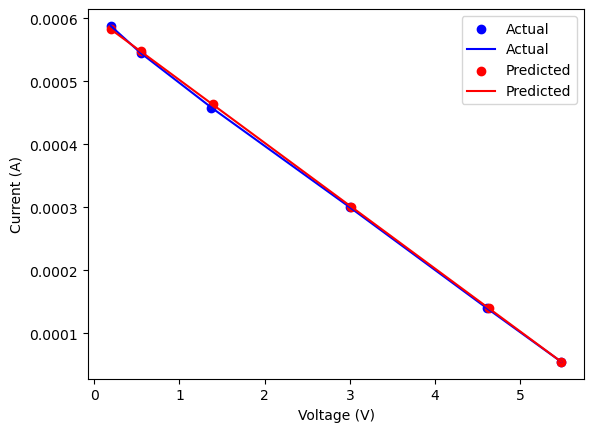

In [10]:
#voltage = np.array([4.61, 0.194, 0.545, 5.48, 1.375, 3.00])
voltage = np.array([0.194, 0.545, 1.375, 3.00, 4.61, 5.48])
# voltage = np.array(gen_ufloat_array(voltage, dmm_err_dc_voltage))
#resistance = np.array([33e3, 330, 1e3, 100e3, 3e3, 10e3])
resistance = np.array([330, 1e3, 3e3, 10e3, 33e3, 100e3])
# resistance = np.array(gen_ufloat_array(resistance, resistance_err))
current = np.divide(voltage, resistance)

V_open = dmm_err_dc_voltage(6.03)
R_eq = V_open / dmm_err_dc_voltage(0.000602,0.000001, True)
print(R_eq)
R_eq_actual = dmm_err_resistance(9.93e3)
print(R_eq_actual)
print(agreement_test(R_eq,R_eq_actual))

R_eq = R_eq.nominal_value
pred_current = V_open.nominal_value / (resistance + R_eq)
pred_voltage = pred_current * resistance

plt.scatter(voltage, current, color="b", label="Actual")
plt.plot(voltage, current, color="b", label="Actual")
plt.scatter(pred_voltage, pred_current, color="r", label="Predicted")
plt.plot(pred_voltage, pred_current, color="r", label="Predicted")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend()


# Problem 1.9

1.003+/-0.015
0.915+/-0.015
0.509+/-0.013
0.152+/-0.011
Weighted average of all measurements is (1.02+/-0.05)e+06
[1045550.0971095639+/-262032.58477540026
 1031401.9448946516+/-61288.539048576095
 1002760.9886879425+/-85994.26860147016]


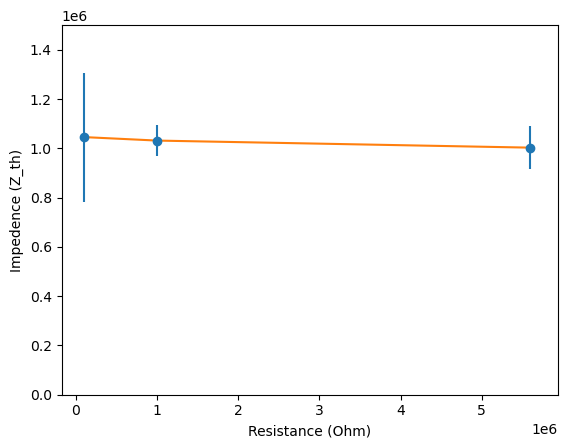

In [11]:
print(ads_err_volt_oscilliscope(1.0027, 0.500))
print(ads_err_volt_oscilliscope(0.91517, 0.500))
print(ads_err_volt_oscilliscope(0.50910, 0.500))
print(ads_err_volt_oscilliscope(0.15228, 0.500))

resistor = np.array(gen_ufloat_array([0, 100e3, 1e6, 5.6e6], lambda x: resistance_err(x).s))
amplitude = np.array(gen_ufloat_array([1.0027, 0.91517, 0.50910, 0.15228], lambda x: ads_err_volt_oscilliscope(x, 0.500)))
V_ext, V_in, resistor = amplitude[0], amplitude[1:], resistor[1:]

Z_th = (V_in/(V_ext-V_in))*resistor

print(f"Weighted average of all measurements is {weighted_average(Z_th)}")
print(Z_th)
resistor, resistor_err = seperate_uncertainty_array(resistor)
Z_th, Z_th_err = seperate_uncertainty_array(Z_th)
plt.errorbar(resistor, Z_th, xerr=resistor_err, yerr=Z_th_err, fmt="o")
plt.plot(resistor, Z_th)
plt.ylim(0, 1.5e6)
plt.xlabel("Resistance (Ohm)")
plt.ylabel("Impedence (Z_th)")
plt.show()


In [12]:
# OLD CODE 
# resistor = np.array([0, 100e3, 1e6, 5.6e6])
# resistor_err = list(map(resistance_err, resistor))
# #amplitude = [1.001, 0.91, 0.51, 0.15]
# amplitude = np.array([1.0027, 0.91517, 0.50910, 0.15228])
# amplitude_err = list(map(lambda x: ads_err_volt_oscilliscope(x, 0.500), amplitude))
# amplitude, amplitude_err = seperate_uncertainty_array(
#     np.divide(1, get_uncertain_array(amplitude, amplitude_err))
# )
# error = combine_linear_uncertainties(
#     np.array(resistor),
#     np.array(amplitude),
#     np.array(resistor_err),
#     np.array(amplitude_err),
# )
# 
# 
# [m, c], [m_err, c_err], [y_pred, res], [chi_squared] = weighted_least_squares_linear(
#     resistor, amplitude, error
# )
# # m, c = simple_least_squares_linear(resistor, np.divide(1, amplitude))
# print(m, c)
# fig, ax = plt.subplots(1,1)
# ax.errorbar(resistor, amplitude, xerr=resistor_err, yerr=amplitude_err, fmt="o")
# ax.plot(resistor, y_pred)
# plt.show()
# 

# Problem 1.10

In [16]:
resistors = np.array(gen_ufloat_array(np.array([47, 100, 1000]), resistance_err))
V_out = np.array(
    gen_ufloat_array(
        np.array([0.48038, 0.66154, 0.95257]), ads_err_volt_oscilliscope
    )
)

I_out = V_out / resistors

diffV = np.array([V_out[1]-V_out[0], V_out[2]-V_out[1]])
diffI = np.array([I_out[1]-I_out[0], I_out[2]-I_out[1]])

print(diffV/diffI)



[-50.24614030056147+/-9.180708468931552
 -51.393031399494596+/-4.531924757743724]


# Problem 1.11

In [18]:
print(np.square(12.0) / 0.25)
internal_impedence = resistance_err(680.0) * (
    dmm_err_dc_voltage(12.06) / dmm_err_dc_voltage(12.05) - 1.0
)
print(internal_impedence.n, internal_impedence.s)
print(680 * (12.06 / 12.05 - 1.0))

576.0
0.5643153526970934 5.610712843332646
0.5643153526970934


# Problem 1.12

[0.55729+/-0.01278645, 0.55681+/-0.01278405, 0.55438+/-0.0127719, 0.53153+/-0.01265765, 0.37627+/-0.01188135, 0.96561+/-0.014828049999999999, 1.9707+/-0.0198535]
[33.099 ± 0.175, 24.063 ± 0.13, 5.43 ± 0.037, 0.779 ± 0.014, 0.193 ± 0.011, 0.177 ± 0.011, 0.454 ± 0.012]
[241.25 ± 1.216, 175.99 ± 0.89, 46.16 ± 0.241, 6.073 ± 0.04, 1.19 ± 0.016, 0.712 ± 0.014, 3.602 ± 0.028]
[495.97 ± 2.49, 458.68 ± 2.303, 261.78 ± 1.319, 49.771 ± 0.259, 5.749 ± 0.039, 0.949 ± 0.015, 29.039 ± 0.155]
[551.84 ± 2.769, 551.22 ± 2.766, 544.02 ± 2.73, 481.26 ± 2.416, 223.18 ± 1.126, 34.732 ± 0.184, 1176.0 ± 5.89]


ValueError: operands could not be broadcast together with shapes (4,) (0,) 

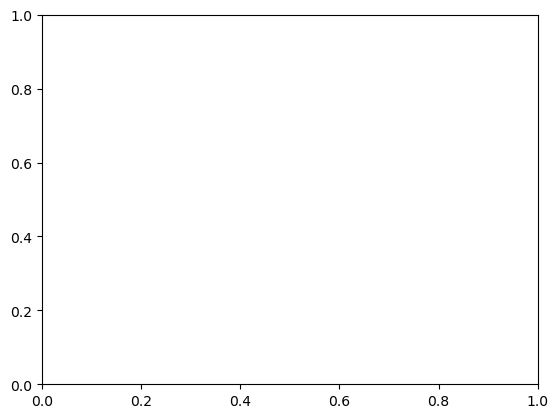

In [21]:
resistance_none_volts = [0.55729, 0.55681,  0.55438,  0.53153,  0.37627,  0.96561,  1.9707]
print (gen_ufloat_array(resistance_none_volts, ads_err_volt_oscilliscope))
resistance_100_volts = [ 33.099,  24.063,    5.4297,  0.77893,  0.19327,  0.17674,  0.45409]
resistance_1k_volts = [241.25,  175.99,  46.160,  6.0730,  1.1899,  0.71203,   3.6015]
resistance_10k_volts = [ 495.97,  458.68,  261.78,  49.771,  5.7487,  0.94901,  29.039]
resistance_1m_volts =  [  551.84,  551.22,  544.02,  481.26,  223.18,  34.732,  1176.0]
resistance_100_volts = gen_ufloat_array(resistance_100_volts, ads_err_volt_oscilliscope)
resistance_1k_volts =  gen_ufloat_array(resistance_1k_volts, ads_err_volt_oscilliscope)
resistance_10k_volts = gen_ufloat_array(resistance_10k_volts, ads_err_volt_oscilliscope)
resistance_1m_volts =  gen_ufloat_array(resistance_1m_volts, ads_err_volt_oscilliscope)
print_ufloats(resistance_100_volts)
print_ufloats(resistance_1k_volts)
print_ufloats(resistance_10k_volts)
print_ufloats(resistance_1m_volts)
resistance_100_volts = np.divide(resistance_100_volts, 1.0e3)
resistance_1k_volts = np.divide(resistance_1k_volts, 1.0e3)
resistance_10k_volts = np.divide(resistance_10k_volts, 1.0e3)
resistance_1m_volts = np.divide(resistance_1m_volts, 1.0e3)


I_out_100 = np.divide(resistance_100_volts, resistance_err(100.0))
I_out_1k = np.divide(resistance_1k_volts, resistance_err(1000.0))
I_out_10k = np.divide(resistance_10k_volts, resistance_err(10000.0))
I_out_1m = np.divide(resistance_1m_volts, resistance_err(1.0e6))
slope = []
i = 0
resistance_measurements = [v+" Ohm Setting" for v in ["200", "2k", "20k", "200k", "2M", "20M", "200M"]]
fig, ax = plt.subplots()
for v100, v1k, v10k, v1m, i100, i1k, i10k, i1m in zip(resistance_100_volts, resistance_1k_volts, resistance_10k_volts, resistance_1m_volts, I_out_100, I_out_1k, I_out_10k, I_out_1m):
    voltage, v_err = seperate_uncertainty_array([v100, v1k, v10k, v1m])
    
    current, I_err = seperate_uncertainty_array([i100, i1k, i10k, i1m])
    err = combine_linear_uncertainties(x=np.array(current), x_err=np.array(I_err), y_err=np.array(v_err), y=np.array(voltage))
    [m, c], [m_err, c_err], [y_pred, res], [chi_squared] = weighted_least_squares_linear(current,voltage, err)
    slope.append(ufloat(m, m_err))

    ax.plot(current, y_pred, color=colors[i])
    ax.errorbar(current, voltage, xerr=I_err, yerr=v_err, fmt="o", color=colors[i], label=resistance_measurements[i])
    i += 1
    #plt.xlim(-.00005, 0.00005)
    #plt.ylim(-0.1, 0.1)
    #print((m, m_err))
    #print(ufloat(m, m_err))

print_ufloats(slope, digits=0)
ax.legend()
ax.set_xlabel("Current (A)")
ax.set_ylabel("Voltage (V)")
# ax.set_xscale('log')

#for v0, v100, v1k, v10k in zip(resistance_none_volts, resistance_100_volts, resistance_1k_volts, resistance_10k_volts ):
#    R = 100.0
#    print(R*(v0-v100)/v100)
#    R = 1000.0
#    print(R*(v0-v1k)/v1k)
#    R = 10000.0
#    print(R*(v0-v10k)/v10k)
plt.show()

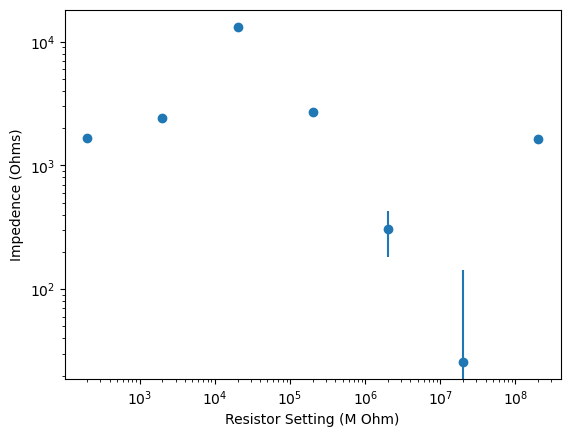

In [ ]:
fig, ax = plt.subplots()
x = [200, 2e3, 20e3, 200e3, 2e6, 20e6, 200e6]
ax.errorbar(x, np.abs(seperate_uncertainty_array(slope)[0]), yerr=seperate_uncertainty_array(slope)[1], fmt="o")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Resistor Setting (M Ohm)")
ax.set_ylabel("Impedence (Ohms)")
plt.show()

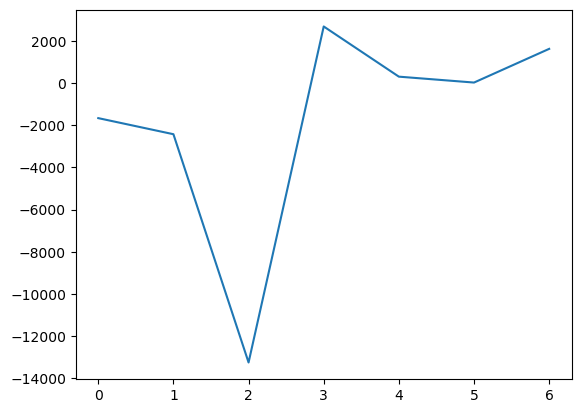

In [ ]:
plt.plot(seperate_uncertainty_array(slope)[0])